In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid")

In [2]:
df = pd.read_csv('NYPD_Motor_Vehicle_Collisions_-_Crashes.csv')

/Users/ryanmichels/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,07/12/2012,8:06,BROOKLYN,11230,40.619397,-73.969566,POINT (-73.9695659 40.6193973),OCEAN PARKWAY,AVENUE L,NaN,...,Unspecified,Unspecified,Unspecified,NaN,130003,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN
1,07/14/2012,14:15,QUEENS,11354,40.774412,-73.806785,POINT (-73.8067849 40.774412),25 DRIVE,157 STREET,NaN,...,Unspecified,NaN,NaN,NaN,245755,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
2,07/14/2012,21:00,QUEENS,11372,40.753538,-73.886897,POINT (-73.8868974 40.7535377),80 STREET,34 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,279750,PASSENGER VEHICLE,UNKNOWN,NaN,NaN,NaN
3,07/15/2012,11:00,MANHATTAN,10028,40.778815,-73.956083,POINT (-73.9560828 40.7788145),EAST 85 STREET,LEXINGTON AVENUE,NaN,...,Other Vehicular,NaN,NaN,NaN,45066,TAXI,TAXI,NaN,NaN,NaN
4,07/06/2012,7:45,QUEENS,11101,40.744658,-73.948523,POINT (-73.9485231 40.7446585),JACKSON AVENUE,21 STREET,NaN,...,Unspecified,NaN,NaN,NaN,238689,SPORT UTILITY / STATION WAGON,LARGE COM VEH(6 OR MORE TIRES),NaN,NaN,NaN


In [4]:
df.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'UNIQUE ID', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5'],
      dtype='object')

In [5]:
timedf = df[['TIME']]

In [6]:
timedf['HOUR'] = timedf['TIME'].apply(lambda x: x.split(':')[0]) 

/Users/ryanmichels/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
timedf.head()

,TIME,HOUR
0,8:06,8
1,14:15,14
2,21:00,21
3,11:00,11
4,7:45,7


In [8]:
timedf['HOUR'].dtype

dtype('O')

In [9]:
timedf['HOUR'] = timedf['HOUR'].astype(int)

/Users/ryanmichels/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
hours = timedf['HOUR'].value_counts()

In [11]:
hours

16    116034
17    112860
14    106793
18     98475
15     98230
13     92003
8      87641
12     87360
9      86011
11     82472
19     79793
10     79388
20     65796
21     54945
22     49481
7      45286
0      44673
23     40462
6      32723
1      24365
5      20470
4      18576
2      18422
3      15978
Name: HOUR, dtype: int64

In [12]:
hours_index = ['12 AM', '1 AM', '2 AM', '3 AM', '4 AM', '5 AM', '6 AM', '7 AM', '8 AM', '9 AM',
              '10 AM', '11 AM', '12 PM', '1 PM', '2 PM', '3 PM', '4 PM', '5 PM', '6 PM', '7 PM', 
               '8 PM', '9 PM', '10 PM', '11 PM']
times = np.arange(0,len(hours))

Text(0, 0.5, 'Number of Accidents')

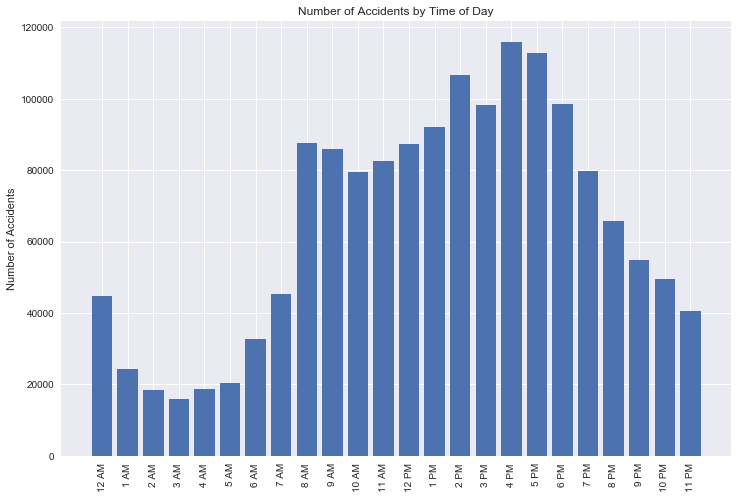

In [13]:
plt.figure(figsize=(12,8))
plt.bar(hours.index,hours.values)
plt.xticks(times, hours_index, rotation='vertical')
plt.title("Number of Accidents by Time of Day")
plt.ylabel("Number of Accidents")

In [14]:
boroughs =  [borough for borough in df['BOROUGH'].unique() if str(borough) != 'nan']

In [15]:
borough_test = df[df['BOROUGH']=='BROOKLYN'][['TIME']]
borough_test.head()

,TIME
0,8:06
10,16:33
14,11:15
18,14:44
30,12:07


In [16]:
def get_hours(df, borough):
    
    borough_df = df[df['BOROUGH']==borough][['TIME']]
    borough_df['HOUR'] = borough_df['TIME'].apply(lambda x: x.split(':')[0]) 
    borough_df['HOUR'] = borough_df['HOUR'].astype(int)
    
    return borough_df

In [17]:
get_hours(df,'BROOKLYN').head()

,TIME,HOUR
0,8:06,8
10,16:33,16
14,11:15,11
18,14:44,14
30,12:07,12


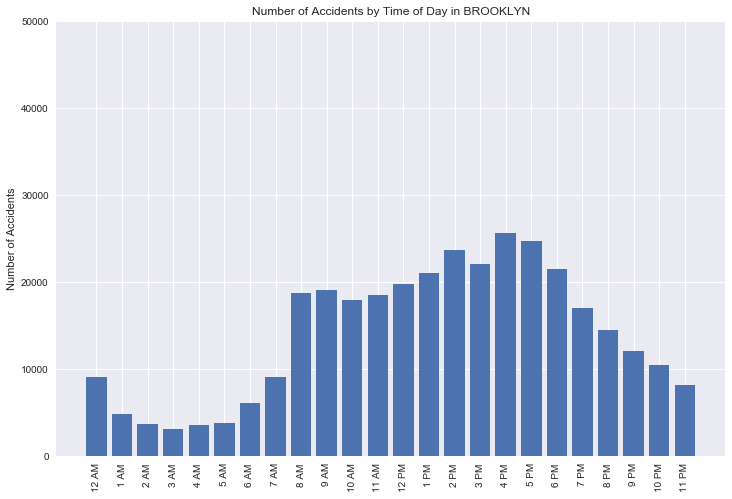

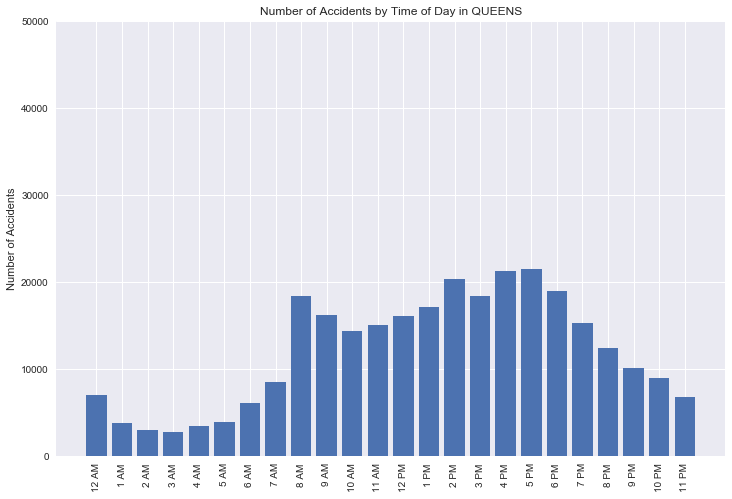

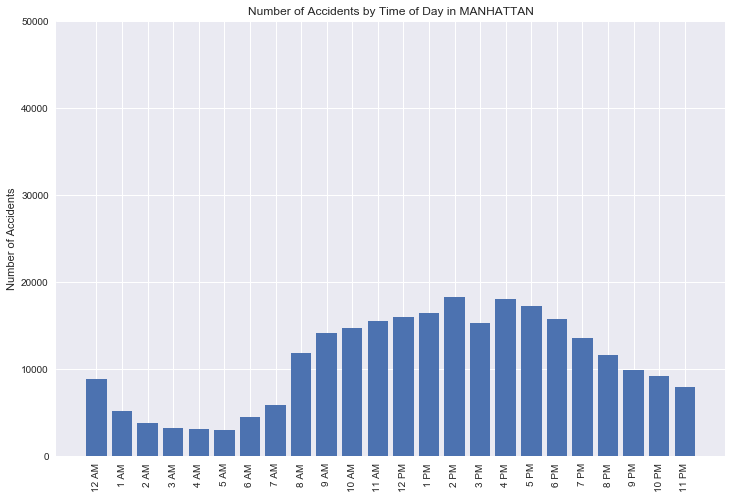

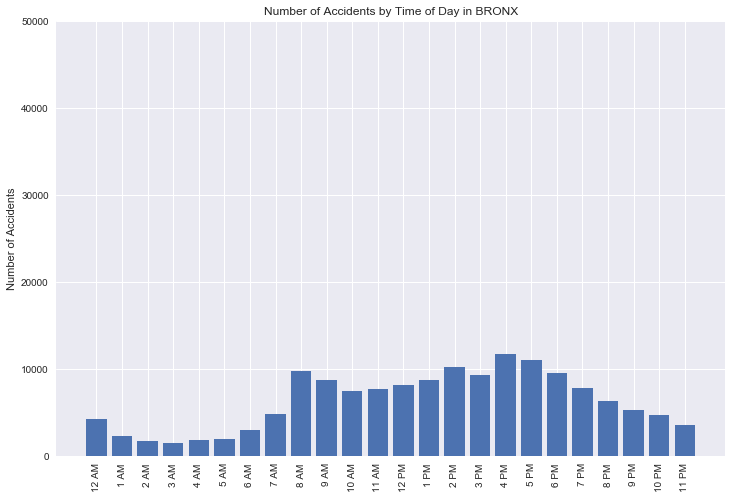

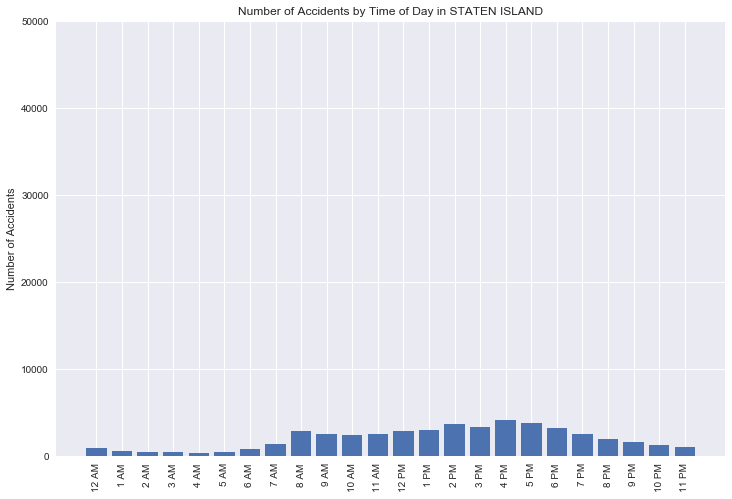

In [18]:
for borough in boroughs:
    
    b_df = get_hours(df,borough)
    
    hours = b_df['HOUR'].value_counts()

    plt.figure(figsize=(12,8))
    plt.bar(hours.index,hours.values)
    plt.xticks(times, hours_index, rotation='vertical')
    plt.title("Number of Accidents by Time of Day in {}".format(borough))
    plt.ylabel("Number of Accidents")
    plt.ylim(0,50000)
    

In [19]:
boroughs

['BROOKLYN', 'QUEENS', 'MANHATTAN', 'BRONX', 'STATEN ISLAND']

In [20]:
bkln = df[df['BOROUGH'] == 'BROOKLYN'][['TIME']]
queens = df[df['BOROUGH'] == 'QUEENS'][['TIME']]
mnhtn = df[df['BOROUGH'] == 'MANHATTAN'][['TIME']]
brnx = df[df['BOROUGH'] == 'BRONX'][['TIME']]
si = df[df['BOROUGH'] == 'STATEN ISLAND'][['TIME']]

bkln['HOUR'] = bkln['TIME'].apply(lambda x: x.split(':')[0]) 
bkln['HOUR'] = bkln['HOUR'].astype(int)
queens['HOUR'] = queens['TIME'].apply(lambda x: x.split(':')[0]) 
queens['HOUR'] = queens['HOUR'].astype(int)
mnhtn['HOUR'] = mnhtn['TIME'].apply(lambda x: x.split(':')[0]) 
mnhtn['HOUR'] = mnhtn['HOUR'].astype(int)
brnx['HOUR'] = brnx['TIME'].apply(lambda x: x.split(':')[0]) 
brnx['HOUR'] = brnx['HOUR'].astype(int)
si['HOUR'] = si['TIME'].apply(lambda x: x.split(':')[0]) 
si['HOUR'] = si['HOUR'].astype(int)


In [21]:
bkln_hours = bkln['HOUR'].value_counts()
quen_hours = queens['HOUR'].value_counts()
mnhtn_hours = mnhtn['HOUR'].value_counts()
brnx_hours = brnx['HOUR'].value_counts()
si_hours = si['HOUR'].value_counts()


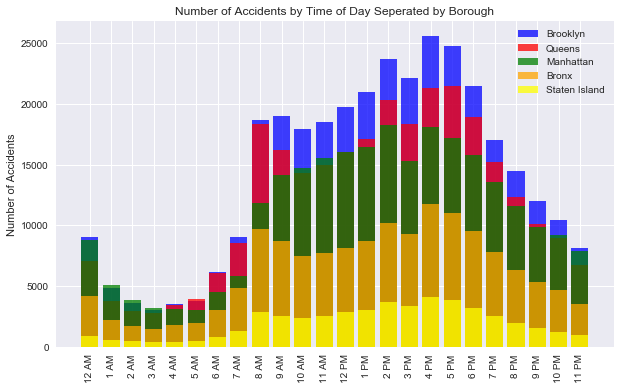

In [22]:
plt.figure(figsize=(10,6))

plt.bar(bkln_hours.index,bkln_hours.values,color='blue',alpha=.75,
        label='Brooklyn')
plt.bar(quen_hours.index,quen_hours.values,color='red',alpha=.75,
        label='Queens')
plt.bar(mnhtn_hours.index,mnhtn_hours.values,color='green', alpha=.75,
        label='Manhattan')
plt.bar(brnx_hours.index,brnx_hours.values,color='orange', alpha=.75,
        label='Bronx')
plt.bar(si_hours.index,si_hours.values,color='yellow', alpha=.75,
        label='Staten Island')

plt.xticks(times, hours_index, rotation='vertical')
plt.title("Number of Accidents by Time of Day Seperated by Borough")
plt.ylabel("Number of Accidents")
plt.legend()

In [23]:
df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

Unspecified                                              579279
Driver Inattention/Distraction                           286053
Failure to Yield Right-of-Way                             88020
Following Too Closely                                     75546
Backing Unsafely                                          59362
Other Vehicular                                           49670
Fatigued/Drowsy                                           46813
Turning Improperly                                        40040
Passing or Lane Usage Improper                            35617
Passing Too Closely                                       32586
Unsafe Lane Changing                                      29135
Traffic Control Disregarded                               23767
Driver Inexperience                                       22822
Lost Consciousness                                        19578
Pavement Slippery                                         15632
Prescription Medication                 

In [24]:
sleepy =  df[df['CONTRIBUTING FACTOR VEHICLE 1']=='Fatigued/Drowsy'][['TIME']]

In [25]:
sleepy['HOUR'] = sleepy['TIME'].apply(lambda x: x.split(':')[0])
sleepy['HOUR'] = sleepy['HOUR'].astype(int)

In [26]:
sleepy_hours = sleepy['HOUR'].value_counts()

In [27]:
hours

16    4072
17    3815
14    3669
15    3364
18    3222
13    3015
8     2874
12    2853
11    2514
9     2499
19    2496
10    2387
20    1952
21    1552
7     1309
22    1248
23     994
0      929
6      819
1      524
2      476
5      448
3      394
4      371
Name: HOUR, dtype: int64

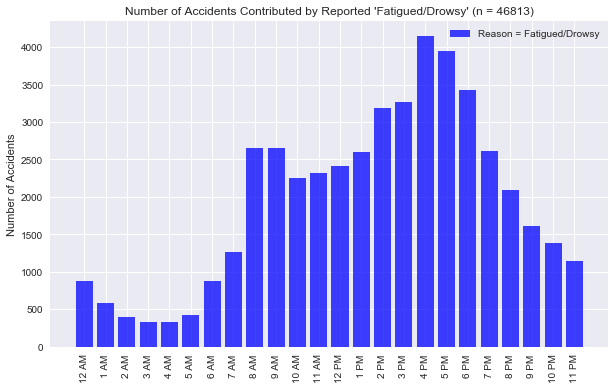

In [28]:
plt.figure(figsize=(10,6))

#plt.bar(hours.index,hours.values, color = 'red', alpha = .75 , label ='Total of Collisions')
plt.bar(sleepy_hours.index,sleepy_hours.values, color = 'blue', alpha = .75 , label ='Reason = Fatigued/Drowsy')


plt.xticks(times, hours_index, rotation='vertical')
plt.title("Number of Accidents Contributed by Reported 'Fatigued/Drowsy' (n = 46813)")
plt.ylabel("Number of Accidents")
plt.legend()


Text(0, 0.5, 'Number of Accidents')

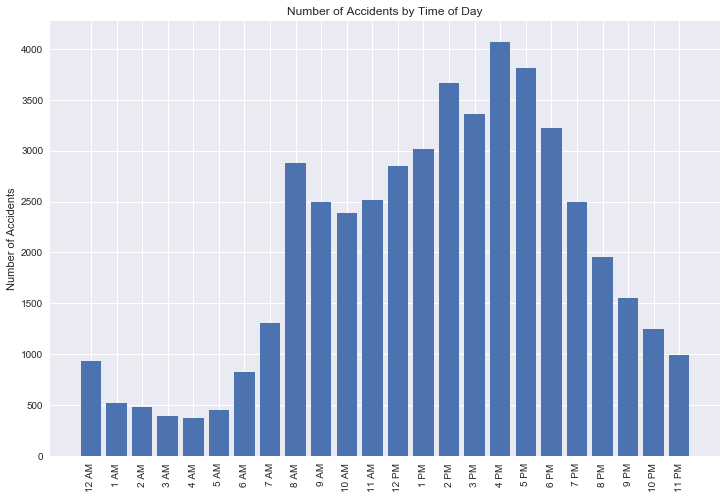

In [29]:
plt.figure(figsize=(12,8))
plt.bar(hours.index,hours.values)
plt.xticks(times, hours_index, rotation='vertical')
plt.title("Number of Accidents by Time of Day")
plt.ylabel("Number of Accidents")

In [30]:
total_hours_df = df

In [31]:
total_hours_df['HOUR'] = total_hours_df['TIME'].apply(lambda x: x.split(':')[0])

In [32]:
total_hours_df.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,HOUR
0,07/12/2012,8:06,BROOKLYN,11230,40.619397,-73.969566,POINT (-73.9695659 40.6193973),OCEAN PARKWAY,AVENUE L,NaN,...,Unspecified,Unspecified,NaN,130003,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,8
1,07/14/2012,14:15,QUEENS,11354,40.774412,-73.806785,POINT (-73.8067849 40.774412),25 DRIVE,157 STREET,NaN,...,NaN,NaN,NaN,245755,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,14
2,07/14/2012,21:00,QUEENS,11372,40.753538,-73.886897,POINT (-73.8868974 40.7535377),80 STREET,34 AVENUE,NaN,...,NaN,NaN,NaN,279750,PASSENGER VEHICLE,UNKNOWN,NaN,NaN,NaN,21
3,07/15/2012,11:00,MANHATTAN,10028,40.778815,-73.956083,POINT (-73.9560828 40.7788145),EAST 85 STREET,LEXINGTON AVENUE,NaN,...,NaN,NaN,NaN,45066,TAXI,TAXI,NaN,NaN,NaN,11
4,07/06/2012,7:45,QUEENS,11101,40.744658,-73.948523,POINT (-73.9485231 40.7446585),JACKSON AVENUE,21 STREET,NaN,...,NaN,NaN,NaN,238689,SPORT UTILITY / STATION WAGON,LARGE COM VEH(6 OR MORE TIRES),NaN,NaN,NaN,7


In [33]:
ra = total_hours_df.groupby('HOUR')[['DATE']].count()

In [34]:
ra['HOUR']=ra.index

In [35]:
ra['HOUR'] = ra['HOUR'].astype(int)

In [36]:
ra = ra.sort_values(by='HOUR',ascending=True)

In [37]:
ra = ra.reset_index(drop=True)

([<matplotlib.axis.XTick at 0x1199e9080>,
 <a list of 24 Text xticklabel objects>)

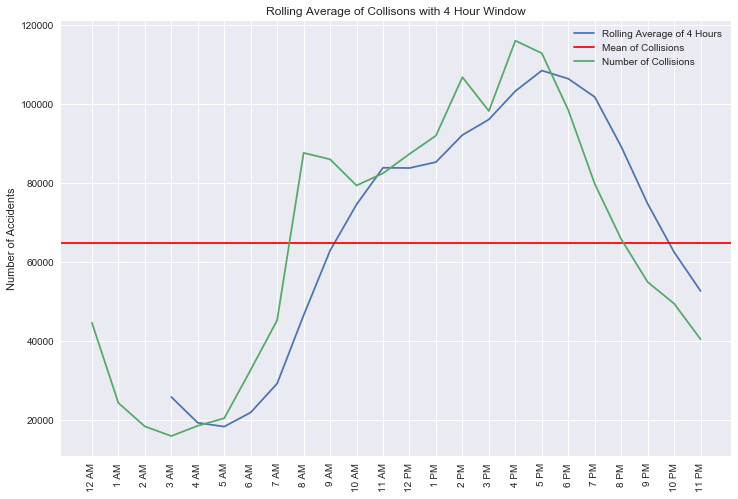

In [38]:
plt.figure(figsize=(12,8))


plt.plot(ra['DATE'].rolling(window=4).mean(),label='Rolling Average of 4 Hours')
plt.axhline(y=ra['DATE'].mean(), color='r', linestyle='-', label='Mean of Collisions')
plt.plot(ra['DATE'],label='Number of Collisions')
plt.ylabel("Number of Accidents")
plt.title("Rolling Average of Collisons with 4 Hour Window")

plt.legend()
plt.xticks(times, hours_index, rotation='vertical')

In [45]:
sleepy_pct = sleepy.groupby('HOUR')[['TIME']].count()

In [46]:
sleepy_pct['TIME PERCENTAGE'] = sleepy_pct.apply(lambda x: (x/sleepy_pct['TIME'].sum()*100))

In [47]:
timedf_pct = timedf.groupby('HOUR')[['TIME']].count()

In [48]:
timedf_pct['TIME PERCENTAGE'] = timedf_pct.apply(lambda x: (x/timedf_pct['TIME'].sum()*100))

In [44]:
timedf_pct

,TIME,TIME PERCENTAGE
HOUR,,
0,44673,2.866894
1,24365,1.563626
2,18422,1.182234
3,15978,1.025390
4,18576,1.192116
5,20470,1.313664
6,32723,2.100001
7,45286,2.906233
8,87641,5.624369


[Text(0, 0, '0%'),
 Text(0, 0, '2%'),
 Text(0, 0, '4%'),
 Text(0, 0, '6%'),
 Text(0, 0, '8%'),
 Text(0, 0, '10%')]

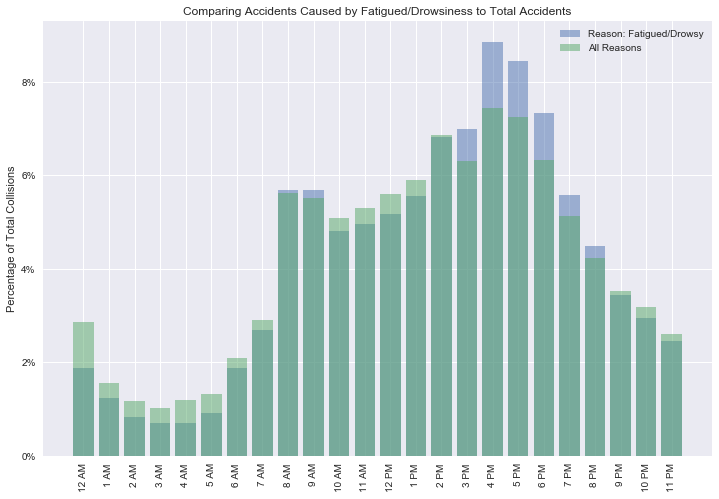

In [49]:
plt.figure(figsize=(12,8))


plt.bar(sleepy_pct.index,sleepy_pct['TIME PERCENTAGE'],alpha=.50,label='Reason: Fatigued/Drowsy')
plt.bar(timedf_pct.index,timedf_pct['TIME PERCENTAGE'],alpha=.50, label = 'All Reasons')


plt.ylabel('Percentage of Total Collisions')
plt.xticks(times, hours_index, rotation='vertical')
plt.title('Comparing Accidents Caused by Fatigued/Drowsiness to Total Accidents')
plt.legend()

plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()]) 

In [50]:
chi_s = ra[(ra['HOUR']==7) | (ra['HOUR']==8) | (ra['HOUR']==9)]

In [51]:
chi_s = chi_s.rename(columns={'DATE':'OBSERVED'}) 

In [52]:
chi_s['EXPECTED'] = round(ra['DATE'].mean())

In [53]:
chi_s

,OBSERVED,HOUR,EXPECTED
7,45286,7,64927
8,87641,8,64927
9,86011,9,64927


In [54]:
import scipy.stats as stats

critical_value = stats.chi2.ppf(q = 0.95, df = 2)
print(critical_value)

5.99146454711


In [55]:
stats.chisquare(chi_s['OBSERVED'],chi_s['EXPECTED'])

Power_divergenceResult(statistic=20734.513114728848, pvalue=0.0)

In [56]:
chi_s2 = ra[(ra['HOUR']==8) | (ra['HOUR']==9)| (ra['HOUR']==10) | (ra['HOUR']==16) | (ra['HOUR']==17) | (ra['HOUR']==18)]

In [57]:
chi_s2 = chi_s2.rename(columns={'DATE':'OBSERVED'}) 
chi_s2['EXPECTED'] = round(ra['DATE'].mean())
chi_s2

,OBSERVED,HOUR,EXPECTED
8,87641,8,64927
9,86011,9,64927
10,79388,10,64927
16,116034,16,64927
17,112860,17,64927
18,98475,18,64927


In [58]:
critical_value = stats.chi2.ppf(q = 0.95, df = 5)
print(critical_value)

11.0704976935


In [59]:
stats.chisquare(chi_s2['OBSERVED'],chi_s2['EXPECTED'])

Power_divergenceResult(statistic=110963.81497682013, pvalue=0.0)

In [62]:
chi_s3 = ra[(ra['HOUR']==2) | (ra['HOUR']==14)| (ra['HOUR']==21)] 
chi_s3 = chi_s3.rename(columns={'DATE':'OBSERVED'}) 
chi_s3['EXPECTED'] = round(ra['DATE'].mean())




critical_value = stats.chi2.ppf(q = 0.95, df = 2)
chi_s3

,OBSERVED,HOUR,EXPECTED
2,18422,2,64927
14,106793,14,64927
21,54945,21,64927


In [63]:
critical_value = stats.chi2.ppf(q = 0.95, df = 2)
print(critical_value)

5.99146454711


In [64]:
stats.chisquare(chi_s3['OBSERVED'],chi_s3['EXPECTED'])

Power_divergenceResult(statistic=61840.487085496025, pvalue=0.0)